In [1]:
import matplotlib.image as mpimg
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import cv2
#import zipfile
from PIL import Image
  
from keras.callbacks import EarlyStopping
#from keras.preprocessing import image_dataset_from_directory
#from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.np_utils import to_categorical
from keras.utils import image_dataset_from_directory
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras import layers
from tensorflow import keras
#from layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split
#from zipfile import ZipFile
  
import warnings
warnings.filterwarnings('ignore')

In [2]:
#accesing path for dataset
data_path='c:\\ZHAW\\23FS\\KI\\DataForProject'
train_path='c:\\ZHAW\\23FS\\KI\\DataForProject\\Train'

#Variables for resizing
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3
BATCH_SIZE = 32

#Getting Total Nr of Classes from Train Folder
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [3]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [4]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = train_path + "\\" + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '\\' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

# rescalling
X_train = X_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)

print("X_train Type:", X_train.dtype)
print("X_valid Type", X_valid.dtype)

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train Type: float32
X_valid Type float32
X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [6]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_valid = keras.utils.to_categorical(y_valid, NUM_CATEGORIES)

print(y_train.shape)
print(y_valid.shape)

(27446, 43)
(11763, 43)


In [7]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

# example
rescale(np.asarray([0, 255]))

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1.,  1.], dtype=float32)>

In [8]:
#Creating data augementation layers
data_augmentation = tf.keras.Sequential([
  layers.RandomContrast(0.5),
  layers.RandomBrightness(0.5),
  layers.RandomZoom(.5, .2)
])

In [9]:
X = (30, 30, 3)

#Building the model
model = Sequential()
rescale,
data_augmentation,
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
687/687 [==============================] - 29s 41ms/step - loss: 2.4416 - accuracy: 0.4035 - val_loss: 1.0163 - val_accuracy: 0.7561
Epoch 2/15
687/687 [==============================] - 29s 42ms/step - loss: 1.0785 - accuracy: 0.6892 - val_loss: 0.5546 - val_accuracy: 0.8639
Epoch 3/15
687/687 [==============================] - 32s 46ms/step - loss: 0.8242 - accuracy: 0.7567 - val_loss: 0.4280 - val_accuracy: 0.8778
Epoch 4/15
687/687 [==============================] - 32s 47ms/step - loss: 0.7058 - accuracy: 0.7906 - val_loss: 0.3072 - val_accuracy: 0.9115
Epoch 5/15
687/687 [==============================] - 32s 47ms/step - loss: 0.6103 - accuracy: 0.8184 - val_loss: 0.2597 - val_accuracy: 0.9208
Epoch 6/15
687/687 [==============================] - 32s 47ms/step - loss: 0.5680 - accuracy: 0.8298 - val_loss: 0.2568 - val_accuracy: 0.9235
Epoch 7/15
687/687 [==============================] - 33s 48ms/step - loss: 0.5138 - accuracy: 0.8463 - val_loss: 0.1815 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

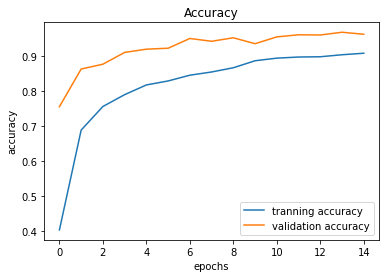

In [12]:
#accuracy
plt.figure(0)
plt.plot(history.history['accuracy'],label='tranning accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

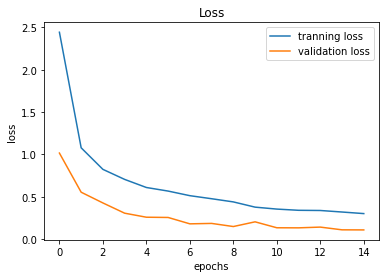

In [13]:
#Loss
plt.plot(history.history['loss'],label='tranning loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show

In [14]:
test = pd.read_csv(data_path + '\\Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_path + '\\' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
# X_test = X_test/255

#pred = model.predict(X_test)
pred = np.argmax(model.predict(X_test),axis=1)

395/395 [==============================] - 3s 7ms/step


In [15]:
#Classification report
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.89      0.57      0.69        60
           1       0.97      0.92      0.94       720
           2       0.90      0.96      0.93       750
           3       0.84      0.97      0.90       450
           4       0.96      0.96      0.96       660
           5       0.86      0.88      0.87       630
           6       1.00      0.69      0.82       150
           7       0.98      0.88      0.93       450
           8       0.85      0.95      0.90       450
           9       0.95      0.99      0.97       480
          10       0.97      0.98      0.97       660
          11       0.99      0.80      0.88       420
          12       0.98      0.96      0.97       690
          13       0.96      0.99      0.98       720
          14       1.00      0.99      0.99       270
          15       0.83      0.94      0.88       210
          16       1.00      0.97      0.99       150
          17       0.99    

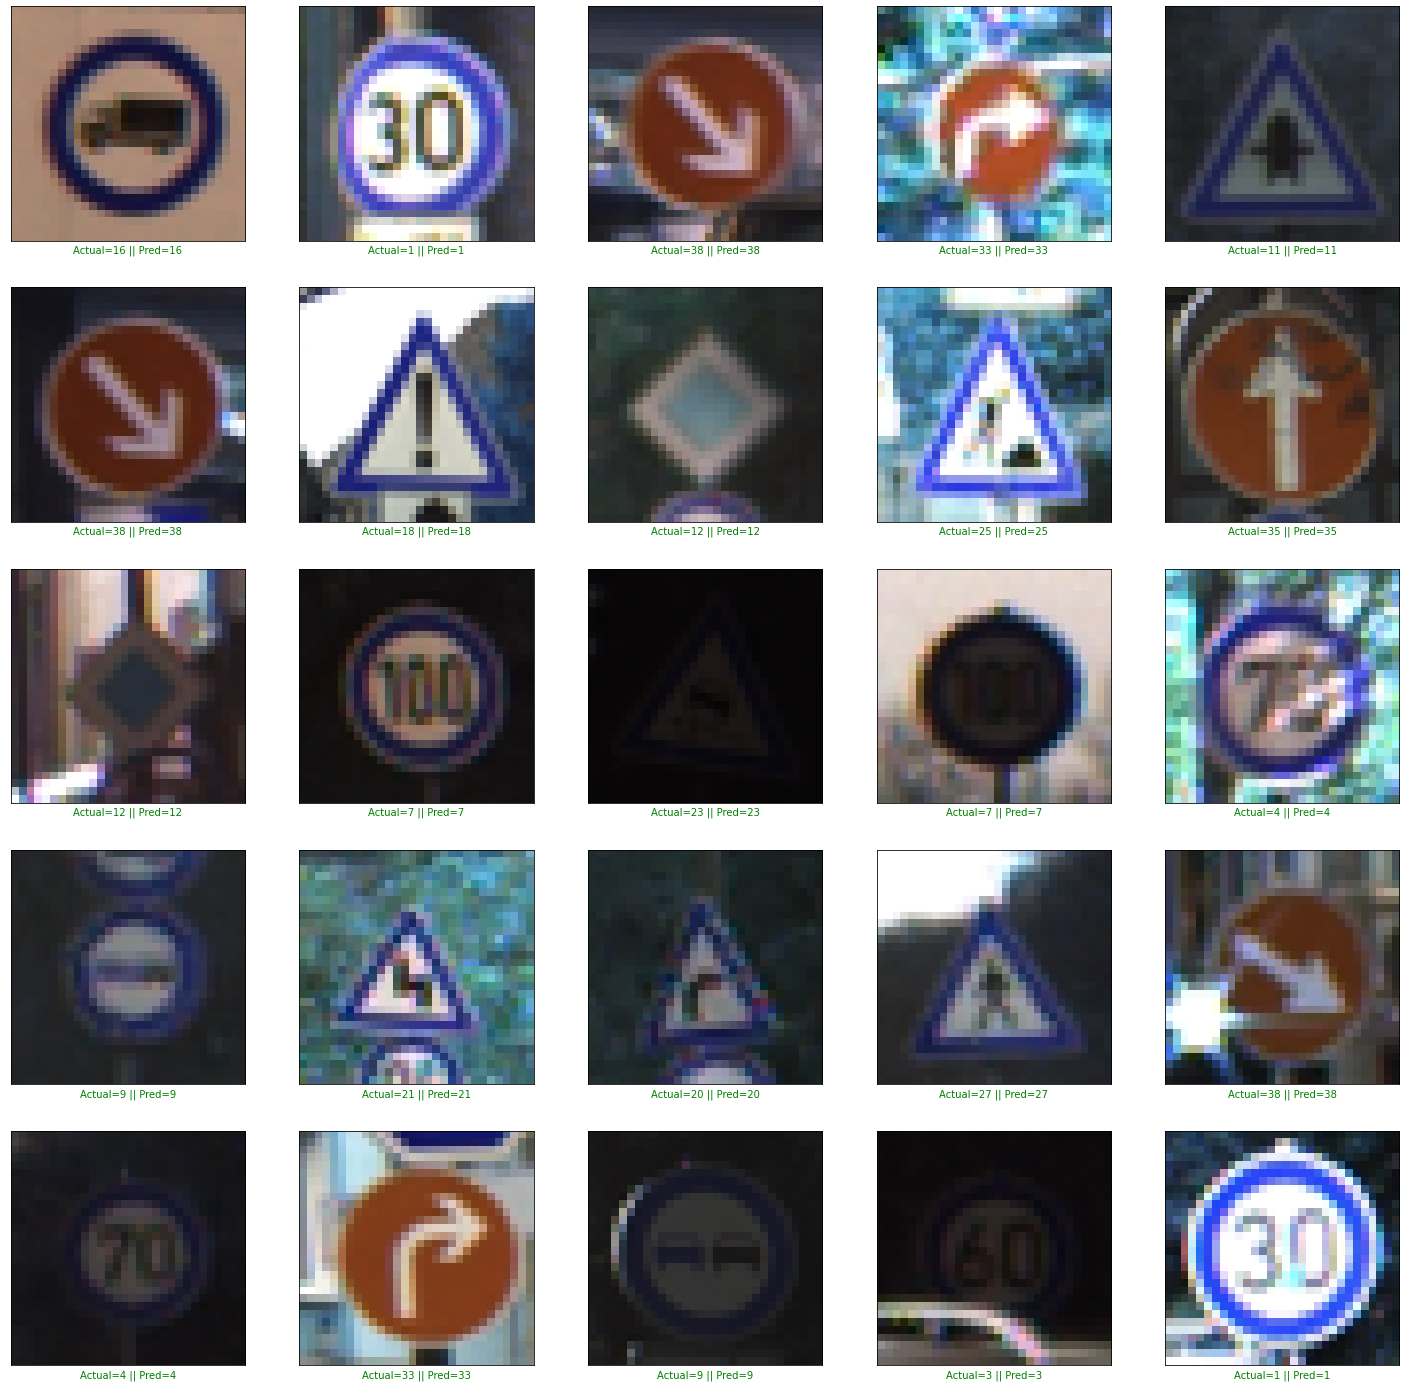

In [16]:
#Predictions on Test Data
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [17]:
X = (30, 30, 3)

#Building the model
model2 = Sequential()
rescale,
data_augmentation,
model2.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=X))
model2.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.25))
model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.25))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(43, activation='softmax'))

In [18]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history2 = model2.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
687/687 [==============================] - 16s 22ms/step - loss: 2.6683 - accuracy: 0.3897 - val_loss: 0.7291 - val_accuracy: 0.8277
Epoch 2/15
687/687 [==============================] - 15s 22ms/step - loss: 0.9126 - accuracy: 0.7393 - val_loss: 0.3037 - val_accuracy: 0.9200
Epoch 3/15
687/687 [==============================] - 16s 23ms/step - loss: 0.5755 - accuracy: 0.8342 - val_loss: 0.1909 - val_accuracy: 0.9488
Epoch 4/15
687/687 [==============================] - 15s 22ms/step - loss: 0.4248 - accuracy: 0.8795 - val_loss: 0.1630 - val_accuracy: 0.9621
Epoch 5/15
687/687 [==============================] - 16s 23ms/step - loss: 0.3650 - accuracy: 0.8955 - val_loss: 0.2084 - val_accuracy: 0.9408
Epoch 6/15
687/687 [==============================] - 16s 24ms/step - loss: 0.3138 - accuracy: 0.9135 - val_loss: 0.1038 - val_accuracy: 0.9716
Epoch 7/15
687/687 [==============================] - 17s 25ms/step - loss: 0.3134 - accuracy: 0.9146 - val_loss: 0.0827 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

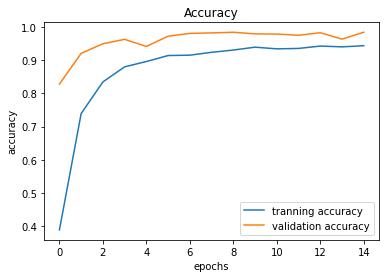

In [20]:
#accuracy
plt.figure(0)
plt.plot(history2.history['accuracy'],label='tranning accuracy')
plt.plot(history2.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

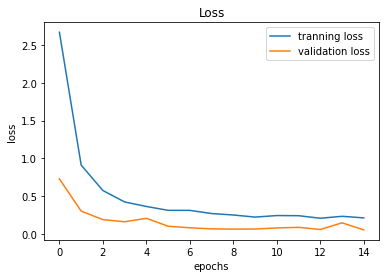

In [21]:
#Loss
plt.plot(history2.history['loss'],label='tranning loss')
plt.plot(history2.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show